# Importing Libraries

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.1 MB/s eta 

In [2]:
import gradio as gr

In [39]:
import numpy as np
import tensorflow as tf
import os
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, experimental
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report

# Load Dataset

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d willyardiyanto/12-ras-kucing-noval

Dataset URL: https://www.kaggle.com/datasets/willyardiyanto/12-ras-kucing-noval
License(s): unknown
 95% 398M/419M [00:04<00:00, 115MB/s]
100% 419M/419M [00:04<00:00, 106MB/s]


In [6]:
!unzip 12-ras-kucing-noval.zip

Archive:  12-ras-kucing-noval.zip
  inflating: 12-ras-kucing-noval/.git/COMMIT_EDITMSG  
  inflating: 12-ras-kucing-noval/.git/HEAD  
  inflating: 12-ras-kucing-noval/.git/config  
  inflating: 12-ras-kucing-noval/.git/description  
  inflating: 12-ras-kucing-noval/.git/hooks/applypatch-msg.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/commit-msg.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/fsmonitor-watchman.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/post-update.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-applypatch.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-commit.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-merge-commit.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-push.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-rebase.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/pre-receive.sample  
  inflating: 12-ras-kucing-noval/.git/hooks/prepare-commit-msg.sample  
  inflating: 12-ras-kucing-noval/

# Image Preprocessing

In [7]:
import pathlib
data_dir = pathlib.Path('/content/12-ras-kucing-noval/train')

/content/12-ras-kucing-noval/train/Persian/Persian_28.jpg


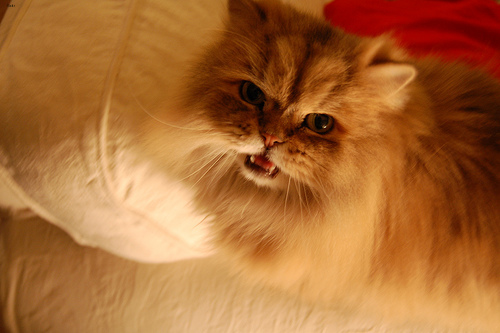

In [8]:
persian = list(data_dir.glob('Persian/*'))
print(persian[0])
PIL.Image.open(str(persian[0]))

/content/12-ras-kucing-noval/train/Birman/Birman_25.jpg


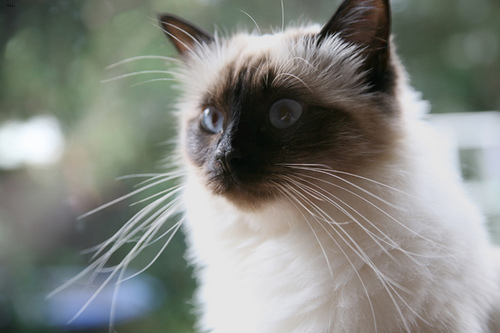

In [9]:
birman = list(data_dir.glob('Birman/*'))
print(birman[0])
PIL.Image.open(str(birman[0]))

In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=128,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=128,
    subset='validation'
)

Found 1234 images belonging to 12 classes.
Found 302 images belonging to 12 classes.


In [20]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(150, 150),
#   batch_size=64)

Found 1536 files belonging to 12 classes.
Using 1229 files for training.


In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(150, 150),
#   batch_size=64)

Found 1536 files belonging to 12 classes.
Using 307 files for validation.


In [21]:
class_names = train_gen.class_indices
print(class_names)

{'Abyssunian': 0, 'Bengal': 1, 'Birman': 2, 'Bombay': 3, 'British_shorthair': 4, 'Egyptian_mau': 5, 'Maine_coon': 6, 'Persian': 7, 'Ragdoll': 8, 'Russian_blue': 9, 'Siamese': 10, 'Sphynx': 11}


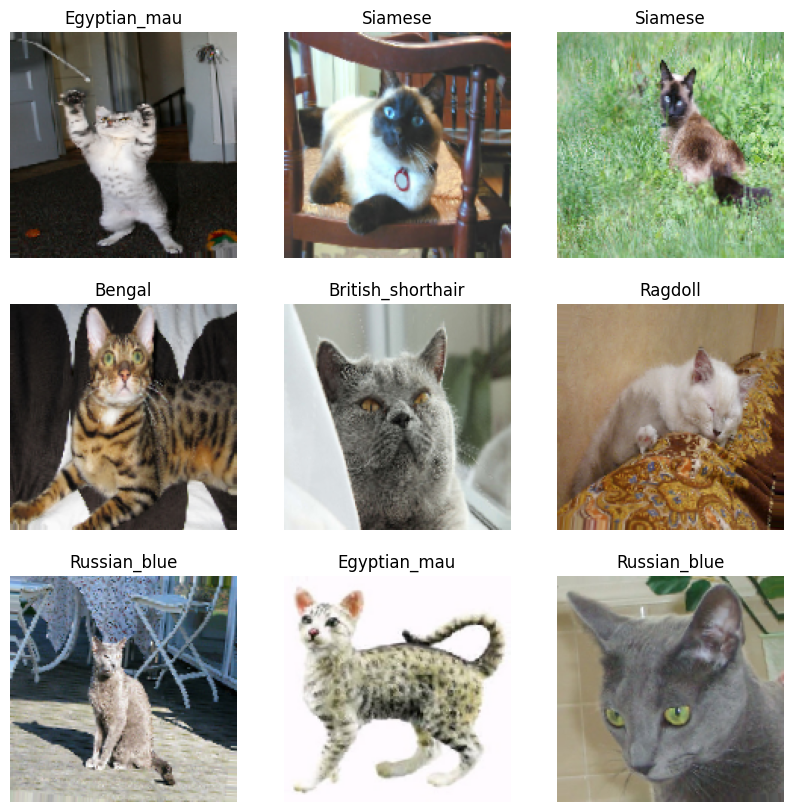

In [24]:
images, labels = next(train_gen)

class_labels = {v: k for k, v in class_names.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_labels[label_index])
    plt.axis("off")
plt.show()

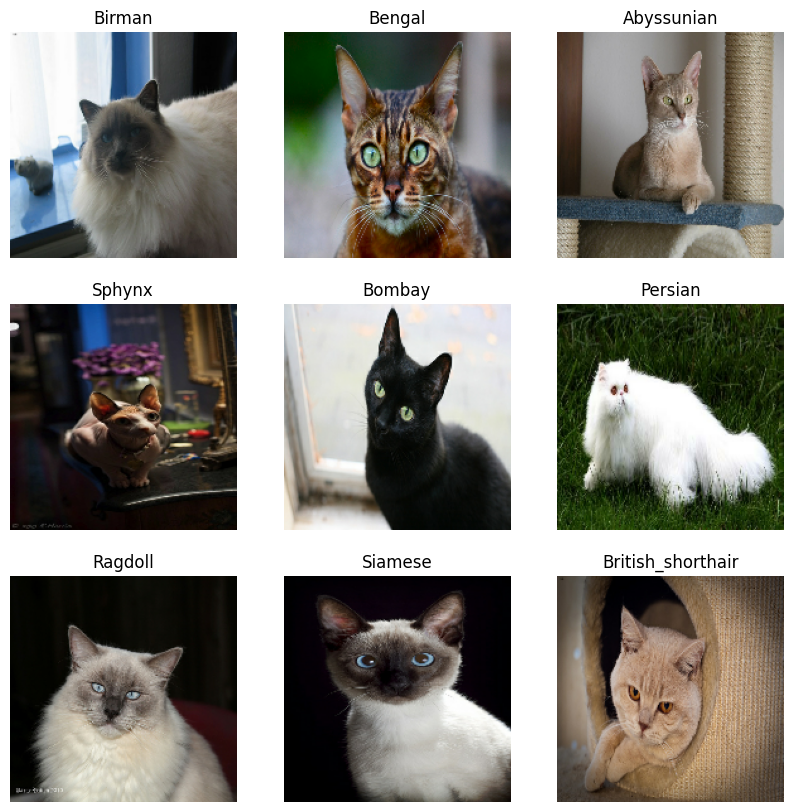

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [31]:
num_classes = 12

base_model = VGG16(include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model = Sequential([
#   experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   Conv2D(16, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Conv2D(32, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Conv2D(64, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(num_classes,activation='softmax')
# ])

In [34]:
epochs=10
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/10
10/10 [==============================] - 435s 44s/step - loss: 0.5691 - accuracy: 0.7990 - val_loss: 1.4049 - val_accuracy: 0.5530
Epoch 2/10
10/10 [==============================] - 488s 50s/step - loss: 0.4751 - accuracy: 0.8436 - val_loss: 1.3779 - val_accuracy: 0.5728
Epoch 3/10
10/10 [==============================] - 427s 43s/step - loss: 0.4455 - accuracy: 0.8395 - val_loss: 1.3780 - val_accuracy: 0.5728
Epoch 4/10
10/10 [==============================] - 422s 43s/step - loss: 0.4414 - accuracy: 0.8452 - val_loss: 1.3605 - val_accuracy: 0.6060
Epoch 5/10
10/10 [==============================] - 483s 49s/step - loss: 0.3761 - accuracy: 0.8776 - val_loss: 1.3793 - val_accuracy: 0.6060
Epoch 6/10
10/10 [==============================] - 423s 43s/step - loss: 0.3286 - accuracy: 0.8849 - val_loss: 1.4982 - val_accuracy: 0.5596
Epoch 7/10
10/10 [==============================] - 422s 43s/step - loss: 0.2899 - accuracy: 0.9028 - val_loss: 1.4567 - val_accuracy: 0.5960


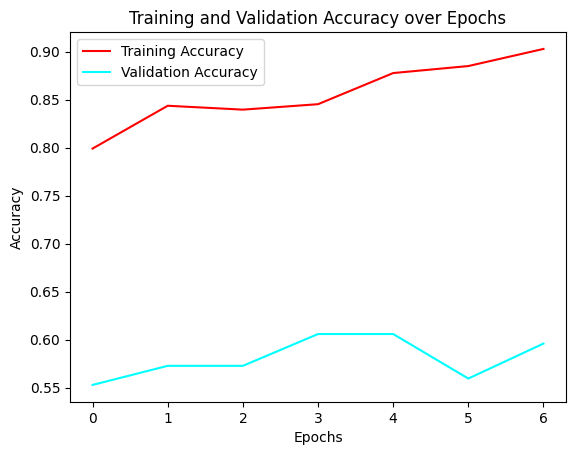

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='cyan', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()

plt.show()

In [37]:
model.save("ModelVGG_RasKucing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model.save("ModelVGG_RasKucing.keras")

3/3 [==============================] - 88s 24s/step - loss: 1.4125 - accuracy: 0.5894
Validation Loss: 1.4124798774719238
Validation Accuracy: 0.5894039869308472
3/3 [==============================] - 87s 23s/step


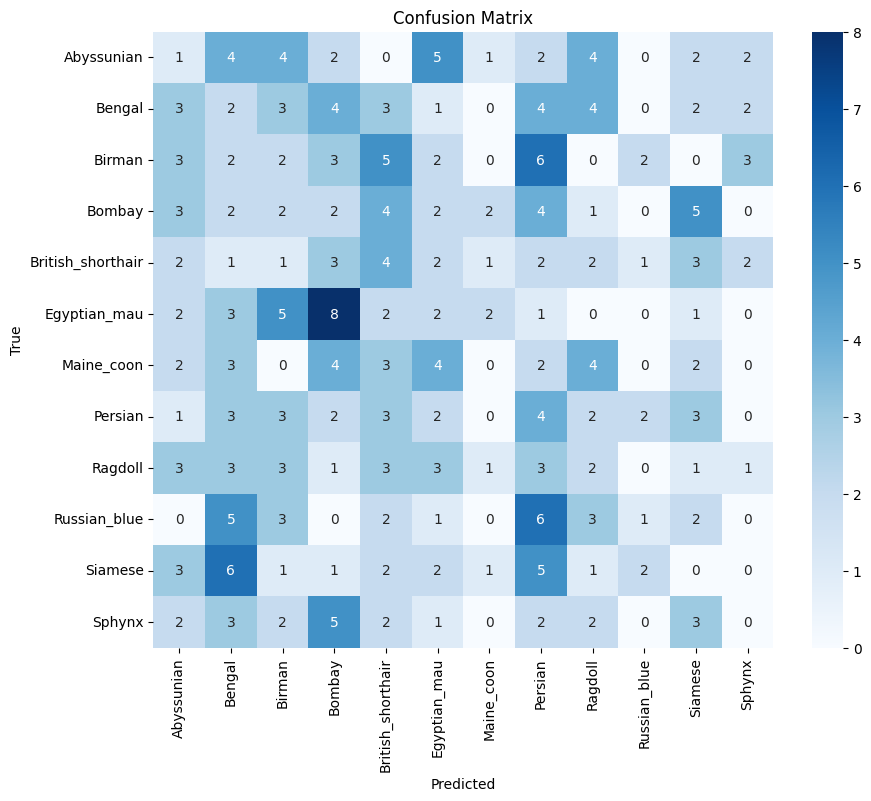

In [40]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

def predict_image(img):
  img = load_img(img, target_size=(180, 180))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  return {class_names[i]: (prediction[i]) for i in range(12)}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


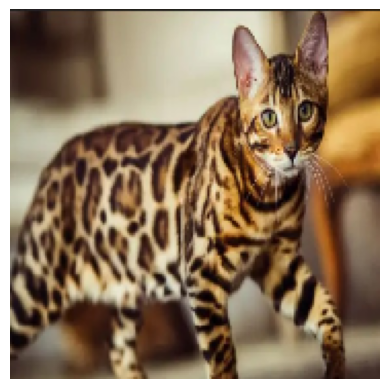

1/1 [==============================] - 0s 33ms/step


{'Abyssunian': 6.4685635e-09,
 'Bengal': 1.0,
 'Birman': 6.2689854e-20,
 'Bombay': 2.0100079e-16,
 'British_shorthair': 6.313361e-12,
 'Egyptian_mau': 3.2962622e-11,
 'Maine_coon': 1.0219115e-08,
 'Persian': 7.719841e-13,
 'Ragdoll': 1.05046e-16,
 'Russian_blue': 1.9744251e-18,
 'Siamese': 2.7016445e-18,
 'Sphynx': 6.593625e-10}

In [ ]:
predict_image('/content/drive/MyDrive/animal predict/cat/2_cat.jpg')

In [ ]:
import tempfile

def predict_from_array(img_array):
    temp_img_path = None
    try:
        # Create a temporary file to save the image
        temp_img = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        temp_img_path = temp_img.name
        temp_img.close()

        # Save the image array to the temporary file
        img = PIL.Image.fromarray(img_array)
        img.save(temp_img_path)

        # Predict using the temporary file path
        result = predict_image(temp_img_path)
    finally:
        # Remove the temporary file
        if temp_img_path and os.path.exists(temp_img_path):
            os.remove(temp_img_path)

    return result

In [ ]:
image = gr.Image()
label = gr.Label(num_top_classes=12)

gr.Interface(fn=predict_from_array, inputs=image, outputs=label).launch(debug='True')

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://afc9d19db3b725e43a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://afc9d19db3b725e43a.gradio.live
